<a href="https://colab.research.google.com/github/MengOonLee/AWSDeepRacer/blob/main/Student/Reward.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reward Function

In [ ]:
import math

def reward_function(params):

    distance_from_center = params['distance_from_center']
    track_width = params['track_width']
    abs_steering = abs(params['steering_angle'])
    speed = params['speed']

    distance_diff = distance_from_center/(0.5*track_width)
    distance_reward = math.exp(-10.0*distance_diff)
    distance_reward = min(1e-3, distance_reward)

    SPEED_MAX = 1.0
    speed_diff = SPEED_MAX - speed
    speed_reward = math.exp(-10.0*speed_diff)
    speed_reward = min(1e-3, speed_reward)

    reward = distance_reward + speed_reward

    ABS_STEERING_THRESHOLD = 15.0
    if abs_steering > ABS_STEERING_THRESHOLD:
        reward *= 0.8

    return float(reward)

In [ ]:
import torch
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

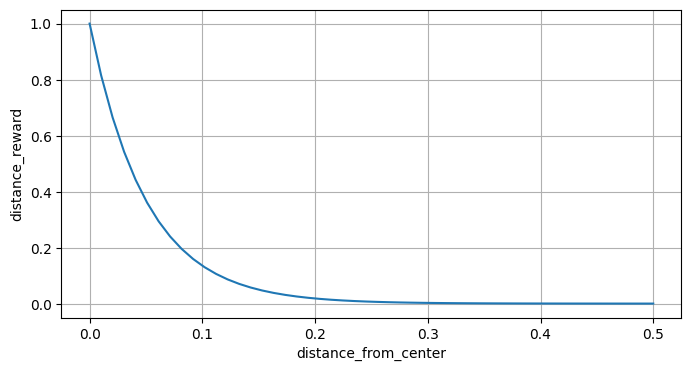

In [ ]:
track_width = torch.tensor(1.0, dtype=torch.float32)
distance_from_center = torch.linspace(start=0, end=0.5, steps=50,
    dtype=torch.float32, requires_grad=False)
distance_diff = distance_from_center/(0.5*track_width)
distance_reward = torch.exp(-10.0*distance_diff)

plt.figure(figsize=(8, 4))
g = sns.lineplot(x=distance_from_center, y=distance_reward)
g.set_xlabel(xlabel="distance_from_center")
g.set_ylabel(ylabel="distance_reward")
g.grid(visible=True)
plt.show()

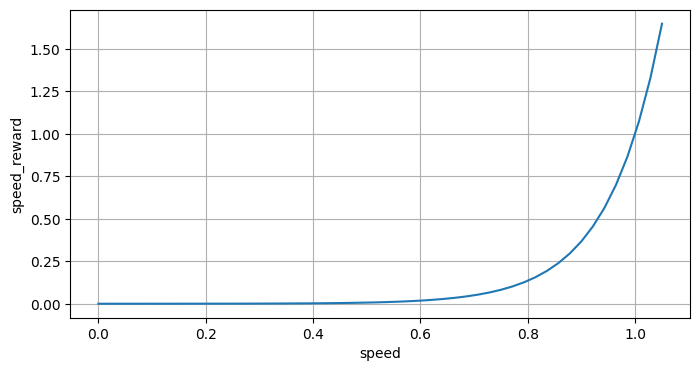

In [ ]:
SPEED_MAX = torch.tensor(1.0, dtype=torch.float32)
speed = torch.linspace(start=0, end=1.05, steps=50,
    dtype=torch.float32, requires_grad=False)
speed_diff = SPEED_MAX - speed
speed_reward = torch.exp(-10.0*speed_diff)

plt.figure(figsize=(8, 4))
g = sns.lineplot(x=speed, y=speed_reward)
g.set_xlabel(xlabel="speed")
g.set_ylabel(ylabel="speed_reward")
g.grid(visible=True)
plt.show()

In [ ]:
def reward_function(params):

    distance_from_center = params['distance_from_center']
    track_width = params['track_width']
    abs_steering = abs(params['steering_angle'])
    speed = params['speed']

    marker_1 = 0.1 * track_width
    marker_2 = 0.25 * track_width
    marker_3 = 0.5 * track_width

    if distance_from_center <= marker_1:
        reward = 1.0
    elif distance_from_center <= marker_2:
        reward = 0.5
    elif distance_from_center <= marker_3:
        reward = 0.1
    else:
        reward = 1e-3

    ABS_STEERING_THRESHOLD = 15

    if (abs_steering > ABS_STEERING_THRESHOLD) | (speed < 0.9):
        reward *= 0.8

    return float(reward)